# Data Driven Decision Making (DDDM)
## Die Aufgabe
Ihr seid von einer US-Amerikanischen Non-Governmental Organisation (NGO) beauftragt die Kriminalität in Chicago zu untersuchen. Die einst große Automobilmetropole kämpft seit vielen Jahren mit steigender Kriminalität und die Bewohner sind zunehmend besorgt.
Eure Aufgabe ist es herauszufinden, welche Verbrechen begangen werden und wo bzw. wann diese begangen werden. Um den Bürgern mehr Vertrauen in die Polizei zu geben, möchte diese datenbasiert entscheiden, wo neue Officers eingesetzt werden sollen und wo mehr Kontrollen nötig sind.


# 1. Fragen stellen
Welche Fragen habe ich? Was möchte ich mithilfe der Daten herausfinden?

Q1: Welche Verbrechen werden begangen?

Q2: Wo werden die Verbrechen begangen?

Q3: Wann werden die Verbrechen begangen?

Q4: Wo sollen mehr Officers eingesetzt werden? 

Q5: Wo sind mehr Kontrollen nötig? (ähnlich wie Q4?)

# 2. Daten explorieren
Zuallererst die Daten importieren und zur Modelierung aufbereiten.
Schaut euch an wie die Daten aussehen, wie viele es sind und welche features es gibt.

## 0.0 Imports

Importieren der Bibliotheken

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import folium
import matplotlib.pyplot as plt
import math
sns.set()
sns.set_style("whitegrid")
%matplotlib inline

Als erstes importieren wir die Bibliothek **pandas**. Pandas ist eine Programmbibliothek, die Hilfsmittel für die Verwaltung von Daten und deren Analyse anbietet. Insbesondere enthält sie Datenstrukturen und Operatoren für den Zugriff auf numerische Tabellen und Zeitreihen. Des Weiteren importieren wir die Bibliothek **numpy**. Numpy ist eine Programmbibliothek, die eine einfache Handhabung von Vektoren, Matrizen oder generell großen mehrdimensionalen Arrays ermöglicht. Neben den Datenstrukturen bietet Numpy auch effizient implementierte Funktionen für numerische Berechnungen an. Danach laden wir die Datenvisualisierungsbibliothek **Seaborn**. Diese bietet eine High-Level-Schnittstelle für die Erstellung attraktiver und informativer statistischer Grafiken. Die Bibliothek **folium** ermöglicht es in Python manipulierte Daten auf Karten graphisch darzustellen. Die Programmierbibliothek **matplotbib** erlaubt es mathematische Darstellungen aller Art anzufertigen. Das Modul **math** ermöglicht den Zugriff auf mathematische Funktionen.

## 2.1 Daten importieren

In den Folgenden zwei Zeilen Code wir die CSV Datei mit den Daten zur Kriminalität in Chicago importiert.

In [2]:
data = pd.read_csv("../input/chicago-crimes/crimes_prep.csv", index_col='Date')
#data_arrest = pd.read_csv("../input/chicago-crimes/crimes_prep.csv", index_col='Community Area')

## 2.2 Daten und schema betrachten

Das ursprüngliche Datumsformat wird in dein Date-Type umgewandelt.

In [3]:
#Konvertieren des Datenformats 
data.index = pd.to_datetime(data.index)

Mithilfe der Funktion **print(data.shape)** können wir uns das Schema des Datensatzes anzeigen lassen. Dies ermöglicht es uns einen ersten Überblick zu gewinnen. Der Datensatz hat 23 Spalten und 1.456.714 Zeilen.

In [4]:
#Größe des Datensatzes
print (data.shape)
print('\n')

#Ausgeben der Spaltennamen
print(data.columns.values)
print('\n')

#Informationen über den Datensatzes
data.info()

(1456714, 23)


['Unnamed: 0' 'Unnamed: 0.1' 'ID' 'Case Number' 'Block' 'IUCR'
 'Primary Type' 'Description' 'Location Description' 'Arrest' 'Domestic'
 'Beat' 'District' 'Ward' 'Community Area' 'FBI Code' 'X Coordinate'
 'Y Coordinate' 'Year' 'Updated On' 'Latitude' 'Longitude' 'Location']


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1456714 entries, 2016-05-03 23:40:00 to 2016-05-03 23:38:00
Data columns (total 23 columns):
Unnamed: 0              1456714 non-null int64
Unnamed: 0.1            1456418 non-null float64
ID                      1456401 non-null float64
Case Number             1456384 non-null object
Block                   1456372 non-null object
IUCR                    1456407 non-null object
Primary Type            1456435 non-null object
Description             1456381 non-null object
Location Description    1454747 non-null object
Arrest                  1456714 non-null bool
Domestic                1456714 non-null bool
Beat                    1456398 non

## 2.3 Daten untersuchen (sample)

Durch das Anzeigen lassen der ersten 5 Zeilen der Tabelle können wir uns einen besseren Eindruck verschaffen. Es wird ersichtlich, dass die Verbrechen in der Stadt Chicago mit Ort und Zeit erfasst werden. Weiterhin wird erfasst, welche Art von Delikt begangen wurde und ob es zu einer Festnahme kam. Die Ortsdaten sind detailliert angegeben. Es ist z.B. möglich die Koordinaten auszulesen oder in welche Art von Gebäude das Verbrechen passiert ist.

In [5]:
#Beispiel Daten anzeigen lassen
data.head(5)

,Unnamed: 0,Unnamed: 0.1,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,,,
2016-05-03 23:40:00,0,3.0,10508693.0,HZ250496,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022.0,10.0,24.0,29.0,08B,1154907.0,1893681.0,2016.0,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
2016-05-03 21:40:00,1,89.0,10508695.0,HZ250409,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313.0,3.0,20.0,42.0,08B,1183066.0,1864330.0,2016.0,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2016-05-03 23:31:00,2,197.0,10508697.0,HZ250503,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524.0,15.0,37.0,25.0,24,1140789.0,1904819.0,2016.0,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
2016-05-03 22:10:00,3,673.0,10508698.0,HZ250424,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,1532.0,15.0,28.0,25.0,08B,1143223.0,1901475.0,2016.0,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
2016-05-03 22:00:00,4,911.0,10508699.0,HZ250455,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523.0,15.0,28.0,25.0,06,1139890.0,1901675.0,2016.0,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


## 2.4 Daten untersuchen (statistisch)

Der Befehl stats = data.describe() gibt eine generelle statistische Beschreibung der Daten aus. Wichtige Tendenzen, Verteilungen und die Form der Verteilung werden sichtbar. Die Anweisung pd.set_option('...) ermöglicht es große Zahlen in wissenschaftlicher Schreibweise auszugeben. 

Man bekommt dadurch einen schnellen Überblick, in welchen Gebieten unsere Zahlen liegen. Bei manchen Labels (z.B. Block, Description, Location) hilft uns die Funktion nicht weiter, da STRINGS in ein FLOAT umgewandelt werden. Jedoch für FLOAT und INTEGER Daten ist diese Funktion sehr hilfreich. Man sieht z.B. bei Community Areas und Year, was der Maximal- & Minimalwert ist und wo sich der Durchschnitt befindet.

In [6]:
#Daten werden statistisch ausgewertet,und als dreistelliges Float zurückgegeben 
stats = data.describe()
pd.set_option('display.float_format', lambda x: '%.3f' % x)
stats

,Unnamed: 0,Unnamed: 0.1,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,1456714.000,1456418.000,1456401.000,1456398.000,1456385.000,1456398.000,1456376.000,1419306.000,1419295.000,1456407.000,1419331.000,1419330.000
mean,728356.500,3308614.620,9597545.965,1150.637,11.259,22.870,37.456,1164398.104,1885523.088,2013.897,41.841,-87.672
std,420517.254,1235362.891,808370.584,691.640,6.905,13.806,21.440,18508.739,34248.434,1.450,0.094,0.067
min,0.000,3.000,20224.000,111.000,1.000,1.000,0.000,0.000,0.000,2012.000,36.619,-91.687
25%,364178.250,2698622.250,9002710.000,613.000,6.000,10.000,23.000,1152544.000,1858762.000,2013.000,41.768,-87.715
50%,728356.500,3063647.500,9605772.000,1024.000,10.000,23.000,32.000,1166021.000,1891502.000,2014.000,41.858,-87.666
75%,1092534.750,3428865.750,10225757.000,1711.000,17.000,34.000,56.000,1176363.000,1908713.000,2015.000,41.905,-87.628
max,1456713.000,6253474.000,10827880.000,2535.000,31.000,50.000,77.000,1205119.000,1951573.000,2017.000,42.023,-87.525


# 3. Daten aufbereiten
Bereitet die Daten für die Analyse vor. Was kann weg, was ist kaputt und welche Features kann ich noch extrahieren?

## 3.1 Daten säubern

Im Folgenden säubern wir die Daten. Wir identifizieren leere Spalten und Reihen und löschen diese. 
Weiterhin löschen wir einige Spalten wie "Unnamed","Case Number","IUCR","FBI Code","X Coordinate", "Y Coordinate" da diese für die weitere Analyse nicht benötigt werden.

In [7]:
#Liste aller 'nan' 
data.isna().sum()

Unnamed: 0                  0
Unnamed: 0.1              296
ID                        313
Case Number               330
Block                     342
IUCR                      307
Primary Type              279
Description               333
Location Description     1967
Arrest                      0
Domestic                    0
Beat                      316
District                  329
Ward                      316
Community Area            338
FBI Code                  324
X Coordinate            37408
Y Coordinate            37419
Year                      307
Updated On                312
Latitude                37383
Longitude               37384
Location                37393
dtype: int64

In [8]:
#Löschen leerer Spalten
data=data.drop(["Unnamed: 0"], axis = 1)
print(data.head())

#Herrauslesen leerer Daten
data.isnull().sum()

#Löschen leerer Reihen
data=data.dropna(how="any")


                     Unnamed: 0.1              ...                                     Location
Date                                           ...                                             
2016-05-03 23:40:00         3.000              ...                (41.864073157, -87.706818608)
2016-05-03 21:40:00        89.000              ...                 (41.782921527, -87.60436317)
2016-05-03 23:31:00       197.000              ...                (41.894908283, -87.758371958)
2016-05-03 22:10:00       673.000              ...                (41.885686845, -87.749515983)
2016-05-03 22:00:00       911.000              ...                (41.886297242, -87.761750709)

[5 rows x 22 columns]


In [9]:
data = data.drop(["Unnamed: 0.1","Case Number","IUCR","FBI Code","X Coordinate","Y Coordinate"],axis=1 )

## 3.2 Features Extrahieren

### Art der Tat

Nun extrahieren wir spezielle Features. 

Zum Beispiel sind die zehn häufigsten Straftaten: Diebstahl (theft) ,tätlicher Angriff mit Körperverletzung (battery), Sachbeschädigung (criminal damage), Betäubungsmittelmissbrauch (narcotics),Versuchte Körperverletzung (assault), sonstige Straftaten (other offense), Betrug (deceptive practice), Autodiebstahl (motor vehicle theft), Raubüberfall (robbery) und Hausfriedensbruch (criminal trespass)

In [10]:
#Arten des Diebstahls
t = data['Primary Type'].value_counts().head(10)
print(t)

print('\n')

#Ort der Tat
l = data['Location Description'].value_counts().head(10)
print(l)

print('\n')

#Wie viele Taten pro Jahr
a = data['Year'].value_counts()
print(a)

print('\n')

#Anzahl der Verhaftungen
a = data['Arrest'].value_counts()
print(a)

THEFT                  320561
BATTERY                257827
CRIMINAL DAMAGE        152141
NARCOTICS              130609
ASSAULT                 89084
OTHER OFFENSE           85018
BURGLARY                81309
DECEPTIVE PRACTICE      67303
MOTOR VEHICLE THEFT     59622
ROBBERY                 55851
Name: Primary Type, dtype: int64


STREET                            323669
RESIDENCE                         222870
APARTMENT                         178673
SIDEWALK                          157836
OTHER                              53240
PARKING LOT/GARAGE(NON.RESID.)     40710
ALLEY                              31103
RESIDENTIAL YARD (FRONT/BACK)      30070
SMALL RETAIL STORE                 28093
SCHOOL, PUBLIC, BUILDING           25352
Name: Location Description, dtype: int64


2012.000    332997
2013.000    302927
2014.000    268123
2015.000    258517
2016.000    249639
2017.000        30
Name: Year, dtype: int64


False    1042857
True      369376
Name: Arrest, dtype: int64


Hier analysieren wir nochmals die Daten bezogen auf ihrer Gesamtzahl. Als erstes sieht man die Gesamtzahlen der 10 Häufigsten Straftaten über die Jahre 2012-2017 hinweg. Zum Beispiel gab es insgesamt 320.561 Diebstähle, und im Vergleich dazu nur 55.851 Raubüberfälle. Der Unterschied ist wie man sieht hier sehr groß.
Darunter befinden sich die „Orte“ an denen die Straftaten passierten. Diese sind nach ihrer Häufigkeit sortiert. Die meisten Taten ereigneten sich auf offener Straße (323.669), wohingegen es an Schulen/ öffentlichen Gebäuden deutlich weniger (25.352) waren.
Darunter ist noch eine Aufteilung der Taten pro Jahr erfolgt. 2012 gab es insgesamt 332.997 Straftaten. 2013 waren es bereits weniger Straftaten (302.927). Man sieht hier bereits, dass es 2012 die meisten Straftaten gab und sie bis 2016 stetig gesunken sind. Man sieht, dass in knapp 4 Jahren sich die Anzahl der Straftaten um ca. 83.000 Straftaten gesunken ist.
Als letztes betrachten wir hier noch wie viele der Straftaten zu einer Festnahme führten und wie viele missglückt sind. Festgenommen wurden über die Jahre 369.376, wo hingegen die Anzahl der Straftaten, die nicht zu einer Verhaftung führten, weit höher ist, nämlich bei 1.042.857.

# 4. Daten Analysieren
Analysiert die Daten. Gibt es etwas Interessantes zu sehen? Behaltet ruhig auch Beispiele von Plots die nichts gebracht haben (auch das ist eine Erkenntnis). Wenn ihr merkt, dass die Daten nicht passen, dann schaut doch nochmal zu Punkt 3.

## 4.1 Graphen erstellen mit jeweiliger Interpretation

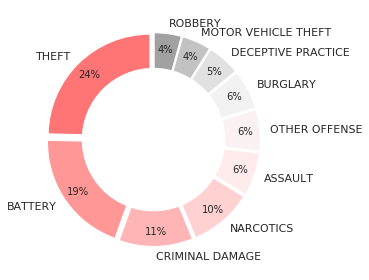

In [11]:
# Pie chart mit den Top 10 Straftaten
labels = data['Primary Type'].value_counts().head(10).index
sizes = data['Primary Type'].value_counts().head(10).values
#Farben der einzelnen Diebstahlarten
colors = ['#FF7575','#FF9797','#FFB5B5','#FFD1D1','#FFEBEB','#FAF2F2','#F2F2F2','#E1E1E1','#C2C2C2','#A1A1A1']
#Abstand der Explosion
explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05)
 
plt.pie(sizes, colors = colors, labels=labels, autopct='%1i%%', startangle=90, pctdistance=0.85, explode = explode)
#Kreis in der Mitte (weißer Kreis)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.tight_layout()
plt.show()

Aus dem obenstehenden Diagramm wird folgendes ersichtlich: Die Straftaten sind ungleichmäßig verteilt. Diebstahl (24 %) und tätlicher Angriff (19 %) mit Körperverletzung machen zusammen genommen fast die Hälfte der Vorfälle bezogen auf die zehn häufigsten Straftaten aus. Jeweils circa ein Zehntel sind Sachbeschädigung und Betäubungsmittelmissbrauch. Die weiteren Vergehen (Versuchte Körperverletzung, sonstige Straftaten, Betrug, Autodiebstahl, Raubüberfall und Hausfriedensbruch) nehmen jeweils circa 5% der zehn häufigsten Straftaten ein.

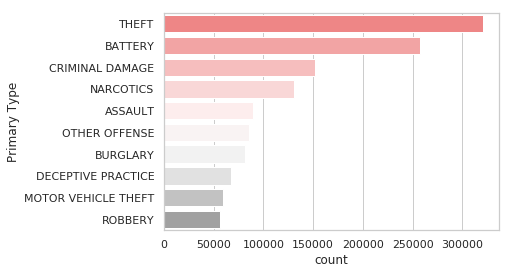

In [12]:
#Erstellung des Diagrams, mit Festlegung des Designs
tp = sns.countplot(y= 'Primary Type', data = data, palette = colors , order = t.index)

Im oberen Diagramm wird aufgezeigt, wie oft welches Verbrechen insgesamt begangen wurde. Die Höchste Anzahl an Verbrechen ist der Diebstahl mit 325 000 Taten.

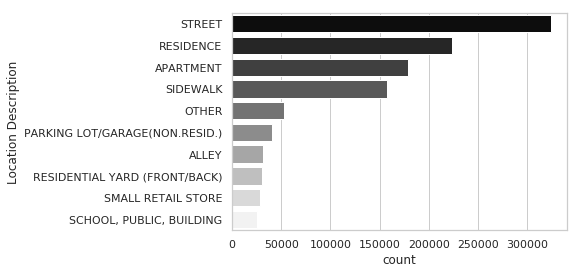

In [13]:
#Festlegung der Farben
colors = ['#0D0D0D','#262626','#404040','#595959','#737373','#8C8C8C','#A6A6A6','#BFBFBF','#D9D9D9','#F2F2F2']

#Erstellung des Diagrams der Tatorte.
l = sns.countplot(y= 'Location Description', data = data, palette = colors, order = l.index)

In Bezug auf die Örtlichkeit der Straftat lässt sich feststellen, dass die meisten Straftaten auf der offenen Straße stattfinden gefolgt von Wohnhäusern und Appartements. Ein weiterer häufiger Tatort ist der Bürgersteig. Wohingegen nur wenige Verbrechen in Garagen, Öffentlichen Einrichtungen und Hinterhöfen verübt werden.

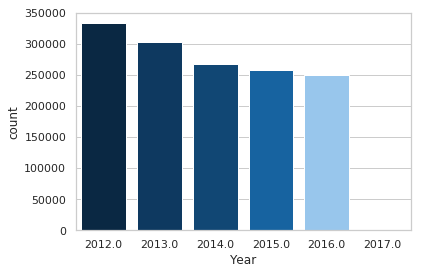

In [14]:
#Festlegung der Farben
colors = ['#00294D','#003A6E','#004985','#0065B7','#8AC7FA','#CAE1FA']



#Erstellung des Diagrams mit der Anzahl der Taten pro Jahr
y = sns.countplot(x= 'Year', palette = colors, data = data)

Aus dem obigen Diagramm ist der deutliche Rückgang der Kriminalität in den letzten Jahren ersichtlich. Von circa 350.000 Straftaten in 2012 ist die Kriminalität auf circa 250.000 Straftaten in 2016 zurückgegangen.

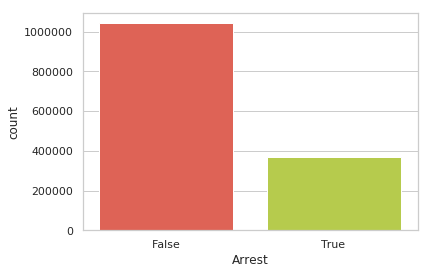

In [15]:
#Festlegung der Farben
colors = ['#F5503F','#C4E038']

#Erstellung eines Diagrams, dass die Anzahl der Verhaftungen darstellt.
a = sns.countplot(x= 'Arrest', palette = colors, data = data)

Die Anzahl der Taten, bei welchen der Täter auch verhaftet wurde, liegt bei nur ca. 390.000. Hingegen wurden bei über 1.000.000 Verbrechen der Täter nicht geschnappt. Die Verhaftungsquote liegt bei nicht mal 30%.
In Bezug auf die Festnahmen lässt sich sagen, dass im überwiegenden Anteil der Polizeieinsätze keine sofortige Verhaftung erfolgt. Dies könnte dazu führen, dass die Bürger die Polizei als zu wenig präsent wahrnehmen.

### Arrest Statistik

Hier wird erstmal ein neues Datenframe zur Hilfe genommen, um die Arrest Daten besser analysieren zu können.

In [16]:
#Kopieren des Datensatzes. Durch Deep= Falsch wird zwar ein neues Objekt erstellt, und die Referenzen zu den Daten werden kopiert.
data_arrest = data.copy(deep=False)
#Zurücksetzen des Indexes, indem der alte Index als normale Spalte erhalten bleibt.
data_arrest.reset_index(inplace=True)
#Community Area als neuen Index setzen 
data_arrest.set_index('Community Area',inplace=True)
#Sortieren der Daten nach Community Area
data_arrest.sort_values(by='Community Area', inplace=True)
#Zurücksetzen des Index
data_arrest.reset_index(inplace=True)
#Ausgabe der ersten 5 Zeilen
data_arrest.head(5)

,Community Area,Date,ID,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Updated On,Latitude,Longitude,Location
0,0.000,2012-02-19 18:54:00,8487665.000,051XX S RUTHERFORD AVE,CRIMINAL DAMAGE,CRIMINAL DEFACEMENT,RESIDENCE-GARAGE,False,False,811.000,8.000,23.000,2012.000,02/04/2016 06:33:39 AM,41.799,-87.791,"(41.799089601, -87.790549465)"
1,1.000,2016-12-13 15:40:00,10783031.000,075XX N CLARK ST,BATTERY,SIMPLE,OTHER,True,False,2422.000,24.000,49.000,2016.000,12/28/2016 03:48:10 PM,42.018,-87.676,"(42.018496028, -87.675942011)"
2,1.000,2015-01-05 15:40:00,9915254.000,016XX W HOWARD ST,ASSAULT,SIMPLE,SIDEWALK,False,False,2422.000,24.000,49.000,2015.000,08/17/2015 03:03:40 PM,42.019,-87.673,"(42.019385566, -87.673147017)"
3,1.000,2014-09-22 07:00:00,9802641.000,016XX W WALLEN AVE,DECEPTIVE PRACTICE,FORGERY,APARTMENT,False,False,2432.000,24.000,49.000,2014.000,02/04/2016 06:33:39 AM,42.003,-87.671,"(42.002625049, -87.671407165)"
4,1.000,2015-01-04 18:00:00,9915250.000,012XX W MORSE AVE,THEFT,$500 AND UNDER,STREET,False,False,2431.000,24.000,49.000,2015.000,08/17/2015 03:03:40 PM,42.008,-87.663,"(42.007966112, -87.662576342)"


In [17]:
all_CommunityArea = data_arrest.index.sort_values().unique()
l_CommunityArea = len(data_arrest['Community Area'].unique())
print("Anzahl der Community Areas: " + str(l_CommunityArea))

cols_to_keep = ['Arrest','Block','Community Area']
cols = data_arrest.columns.values
cols_to_drop = list(set(cols) - set(cols_to_keep))

#Dataframe aus dem die Arrest Daten entnommmen werden bzw. gezählt werden
data_arrest = data_arrest.drop(cols_to_drop, axis = 1)
print(data_arrest.head(10))

#Dataframe, in dem die gezählten Festnahmen & Nicht-Festnahmen gespeichert werden
data_arrest_count = pd.DataFrame(all_CommunityArea, columns=['Community Area'])
data_arrest_count.set_index('Community Area',inplace=True)
data_arrest_count["True Arrest"] = int(0)
data_arrest_count["False Arrest"] = int(0)
print(data_arrest_count.head(5))

Anzahl der Community Areas: 78
   Community Area                   Block  Arrest
0           0.000  051XX S RUTHERFORD AVE   False
1           1.000        075XX N CLARK ST    True
2           1.000       016XX W HOWARD ST   False
3           1.000      016XX W WALLEN AVE   False
4           1.000       012XX W MORSE AVE   False
5           1.000     076XX N SHERIDAN RD   False
6           1.000      075XX N SEELEY AVE   False
7           1.000      014XX W PRATT BLVD   False
8           1.000       074XX N DAMEN AVE    True
9           1.000   021XX W BIRCHWOOD AVE    True
                True Arrest  False Arrest
Community Area                           
0                         0             0
1                         0             0
2                         0             0
3                         0             0
4                         0             0


In [18]:
#For-Schleife, die durch alle Straftaten geht und die Festnahmen & Nicht-Festnahmen pro Community Area zählt
for i in range(len(data_arrest)):
    #Falls, kein Wert vorhanden ist, wird dieser übersprungen
    if math.isnan(data_arrest['Community Area'].iloc[i]):
        continue
    else:
        #Lokalisieren der aktuellen Community Area
        actual_ComArea = int(data_arrest['Community Area'].iloc[i])
        #Lokalisieren der aktuellen Arrest Eigensschaft
        actual_Arrest = data_arrest.iloc[i]['Arrest']
        #Fallunterscheidunge für TRUE oder FALSE Arrest
        if actual_Arrest == True:
            data_arrest_count['True Arrest'].iloc[actual_ComArea] += 1 
        elif actual_Arrest == False:
            data_arrest_count['False Arrest'].iloc[actual_ComArea] += 1
      

In [19]:
from numbers import Number

#Hilfsfunktion für das Darstellen einer Zahl in Prozent
def as_percent(v, precision='0.2'):  
    """Convert number to percentage string."""
    if isinstance(v, Number):
        return "{{:{}%}}".format(precision).format(v)
    else:
        raise TypeError("Numeric type required")

In [20]:
#Dataframe, wird zur Vorsicht kopiert
data_arrest_count_sorted = data_arrest_count.copy()
data_arrest_count_sorted  = data_arrest_count_sorted [1:78]
#Errechnen der Nicht-Festnahmen Rate
data_arrest_count_sorted['Ratio'] = data_arrest_count_sorted['False Arrest'] / (data_arrest_count_sorted['False Arrest'] + data_arrest_count_sorted['True Arrest'])
#Dataframe, wird nach dieser Rate sortiert
data_arrest_count_sorted = data_arrest_count_sorted.sort_values(by='Ratio', ascending=False)
data_arrest_count_sorted['Ratio'] = data_arrest_count_sorted['Ratio'].apply(as_percent) 
data_arrest_count_sorted.head(20)

,True Arrest,False Arrest,Ratio
Community Area,,,
7,2356,18583,88.75%
12,279,2169,88.60%
41,929,7110,88.44%
9,183,1197,86.74%
72,664,4277,86.56%
5,1095,6634,85.83%
24,5819,33698,85.27%
10,938,5402,85.21%
16,2429,13430,84.68%


Hier wurden die 20 häufigsten Orte/Gemeinden, in denen Straftaten begangen wurden, herangezogen. In der Tabelle wurde dann jeweils unterschieden, wie viele Straftäter festgenommen wurden und wie viele nicht. Zum Beispiel wurden in der Gemeinde 7 genau  2.356 Leute festgenommen und 18.583 nicht. In der letzten Spalte sieht man wie viel Prozent der Straftaten nicht festgenommen worden sind.  In der Gemeinde 7 sind es also 88,75%, die nicht festgenommen wurden. Auffällig ist hier auch, dass in allen Top 20 Gemeinden mehr als 80% nicht festgenommen wurden sind, nur knapp 20% der Straftäter wurden also festgenommen.
 
Die Formel für die Ratio setzt sich wie folgt zusammen: 
> Ratio = False Arrest / (False Arrest + true Arrest)

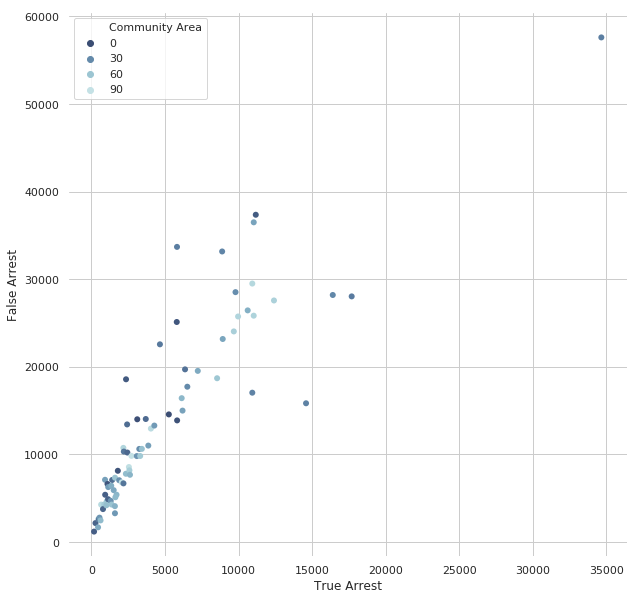

In [21]:
#Style
sns.set(style="whitegrid")


# Scatterplot wird defniert und geplottet
f, ax = plt.subplots(figsize=(10.0, 10.0))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="True Arrest", y="False Arrest",
                hue=data_arrest_count_sorted.index.astype(int),
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 10), linewidth=0,
                data=data_arrest_count_sorted, ax=ax)

Aus diesem Diagramm kann man auslesen, dass in den Community Areas 0 - 30 die meisten Verbrecher für ihre Taten nicht verhaftet werden. Dies ist an der Steilheit der Gerade (gedachte Regresssionsgerade) zu sehen, die von den Punkten gebildet wird. Natürlich gibt es auch ein paar Ausreißer (Outliner), diese fallen allerdings nicht so ins Gewicht.

### Kriminalitäten Statistik bzgl. der Tatzeit

In [22]:
#Kopieren des Datensatzes
data_time = data.copy()
#Zurücksetzen des Indexes
data_time.reset_index(inplace=True)
#Umwandeln der Zeit von 12h zu 24h
data_time['Time'] = data_time['Date'].dt.strftime('%H:%M')
#Darstellung der Zeit nur noch in vollen Stunden
data_time['Time_H'] = data_time['Date'].dt.strftime('%H')
data_time.head(5)

,Date,ID,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Year,Updated On,Latitude,Longitude,Location,Time,Time_H
0,2016-05-03 23:40:00,10508693.000,013XX S SAWYER AVE,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022.000,10.000,24.000,29.000,2016.000,05/10/2016 03:56:50 PM,41.864,-87.707,"(41.864073157, -87.706818608)",23:40,23
1,2016-05-03 21:40:00,10508695.000,061XX S DREXEL AVE,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313.000,3.000,20.000,42.000,2016.000,05/10/2016 03:56:50 PM,41.783,-87.604,"(41.782921527, -87.60436317)",21:40,21
2,2016-05-03 23:31:00,10508697.000,053XX W CHICAGO AVE,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524.000,15.000,37.000,25.000,2016.000,05/10/2016 03:56:50 PM,41.895,-87.758,"(41.894908283, -87.758371958)",23:31,23
3,2016-05-03 22:10:00,10508698.000,049XX W FULTON ST,BATTERY,SIMPLE,SIDEWALK,False,False,1532.000,15.000,28.000,25.000,2016.000,05/10/2016 03:56:50 PM,41.886,-87.750,"(41.885686845, -87.749515983)",22:10,22
4,2016-05-03 22:00:00,10508699.000,003XX N LOTUS AVE,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523.000,15.000,28.000,25.000,2016.000,05/10/2016 03:56:50 PM,41.886,-87.762,"(41.886297242, -87.761750709)",22:00,22


(24,)


19    82096
12    80340
18    80094
20    78893
15    77635
21    74820
22    74234
16    74017
17    73519
14    71463
13    67496
00    67302
11    64989
09    64284
10    62692
23    59951
08    48616
01    42763
02    36760
07    33507
03    30325
06    23735
04    22738
05    19662
Name: Time_H, dtype: int64


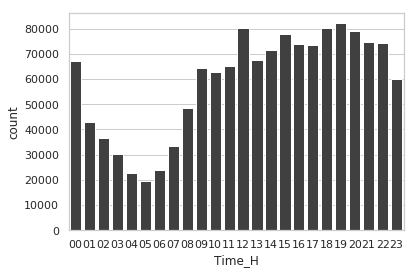

In [23]:
#Festelgung der Farbe
colors = ['#404040']

timeHours = data_time['Time_H'].value_counts()
timeHours = timeHours[:-1]
print(timeHours.shape)
print('\n')
print(timeHours)

#Erstellung Diagram
sns.countplot(x= 'Time_H' , data = data_time, palette = colors, order = timeHours.index.sort_values( ascending=True))

In diesem Säulendiagramm ist die Gesamtzahl der Straftaten nach Tageszeit geordnet. Auf der vertikalen Achse sieht man die Anzahl der Straftaten und auf der horizontalen die Stunde (von 0 Uhr bis 23 Uhr).
Hier sieht man, dass es in den frühen Morgenstunden zu den wenigsten Taten kommt (ca. 2 – 7 Uhr). Gegen Mittag (12 Uhr) und Abend (17 - 19 Uhr) sind  die meisten Straftaten zu vermerken. 

### Karte der verschiedenen Kriminalitäten


In [24]:
#Erstellung der Karte
chicago_map = folium.Map(location=[41.881832, -87.623177], zoom_start=11, )

In [25]:
#Kopieren des Datensatzes
data_map = data.copy()
#Löschen unrelevanter Spalten
data_map = data.drop(columns=['Domestic', 'Beat', 'District', 'Ward','Updated On'], axis = 1)
data_map.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1412233 entries, 2016-05-03 23:40:00 to 2016-05-03 23:38:00
Data columns (total 11 columns):
ID                      1412233 non-null float64
Block                   1412233 non-null object
Primary Type            1412233 non-null object
Description             1412233 non-null object
Location Description    1412233 non-null object
Arrest                  1412233 non-null bool
Community Area          1412233 non-null float64
Year                    1412233 non-null float64
Latitude                1412233 non-null float64
Longitude               1412233 non-null float64
Location                1412233 non-null object
dtypes: bool(1), float64(5), object(5)
memory usage: 159.9+ MB


In [26]:
#Zählen, wie viele verschiedene Orte es gibt
location_nr = data_map['Location'].value_counts()
#Dies wird als Index genommen
location_nr.index
data_map_size = pd.DataFrame({"Raw_String" : location_nr.index, "ValueCount":location_nr})
data_map_size.index = range(len(location_nr))
data_map_size.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367381 entries, 0 to 367380
Data columns (total 2 columns):
Raw_String    367381 non-null object
ValueCount    367381 non-null int64
dtypes: int64(1), object(1)
memory usage: 5.6+ MB


In [27]:
#Hilfsfunktion, für das Extrahieren der Koordinaten (werden gesplittet in lat und long, und wieder zurückgegeben)
def Location_extractor(Raw_Str):
    preProcess = Raw_Str[1:-1].split(',')
    lat =  float(preProcess[0])
    long = float(preProcess[1])
    return (lat, long)

In [28]:
data_map_size['LocationCoord'] = data_map_size['Raw_String'].apply(Location_extractor)

#Löschen nicht benötigter Spalten
data_map_size  = data_map_size.drop(columns=['Raw_String'], axis = 1)
data_map_size.head()

,ValueCount,LocationCoord
0,2079,"(41.883500187, -87.627876698)"
1,2071,"(41.754592961, -87.741528537)"
2,1330,"(41.979006297, -87.906463155)"
3,1308,"(41.897895128, -87.624096605)"
4,1120,"(41.742710224, -87.634088181)"


In [29]:
%%time

#Start-Wert der Map wird definiert
chicago_map_crime = folium.Map(location=[41.895140898, -87.624255632], tiles='Cartodb Positron', 
                        zoom_start=13)

for i in range(500):
    #Datensätze werden duchgegangen und die entsprechenden Werte werden herausgesucht
    lat = data_map_size['LocationCoord'].iloc[i][0]
    long = data_map_size['LocationCoord'].iloc[i][1]
    radius = data_map_size['ValueCount'].iloc[i] / 45
    
    #Grenze für Straftaten wird auf 1000 gesetzt
    if data_map_size['ValueCount'].iloc[i] > 1000:
        #diese werden in Rot angezeigt und geplottet
        color = "#FF7575"
        print("lat: " + str(lat) + " / " + "long: " + str(long) + " / " + " -> " + str(data_map_size['ValueCount'].iloc[i]))
    else:
        #der Rest wird in Grau angezeigt
        color = "#262626"
    
    #Pop-Up Text, welcher beim Klicken erscheint
    popup_text = """<strong>Latitude:</strong> {}<br>
                <strong>Longitude:</strong> {}<br>
                <strong>Criminal Incidents:</strong> {}"""
    popup_text = popup_text.format(lat,
                               long,
                               data_map_size['ValueCount'].iloc[i]
                               )
    #Kreiszeichner vom Framework Folium
    folium.CircleMarker(location = [lat, long], popup= popup_text,radius = radius, color = color, fill = True).add_to(chicago_map_crime)

lat: 41.883500187 / long: -87.627876698 /  -> 2079
lat: 41.754592961 / long: -87.741528537 /  -> 2071
lat: 41.979006297 / long: -87.906463155 /  -> 1330
lat: 41.897895128 / long: -87.624096605 /  -> 1308
lat: 41.742710224 / long: -87.634088181 /  -> 1120
lat: 41.909664252 / long: -87.742728815 /  -> 1071
CPU times: user 124 ms, sys: 8 ms, total: 132 ms
Wall time: 133 ms


Betrachtet man die Orte, mit den höchsten Verbrechensraten, stößt man auf die Community Area 32 mit 2079 Verbrechen und 2071 in der Community Area 66.
Ebenso sehr geballt sind die Verbrechen in der Community Area 76 mit 1330 Verbrechen, außerhalb von Chicago. Weitere Punkte mit hoher Kriminalität sind die Community Areas 8, 44 und 20 mit 1308, 1120 und 1071 Taten.

In [30]:
#Map wird geplottet
chicago_map_crime

### Kriminalitäten über die Jahre

In [31]:
#Gruppieren der Verbrechen pro Jahr
crimes2012 = data.loc["2012"]
crimes2013 = data.loc["2013"]
crimes2014 = data.loc["2014"]
crimes2015 = data.loc["2015"]
crimes2016 = data.loc["2016"]
crimes2017 = data.loc["2017"]

In [32]:
#Erstellen von Datensätze zu den Gruppierungen
crimes2012 = pd.DataFrame(crimes2012)
crimes2013 = pd.DataFrame(crimes2013)
crimes2014 = pd.DataFrame(crimes2014)
crimes2015 = pd.DataFrame(crimes2015)
crimes2016 = pd.DataFrame(crimes2016)
crimes2017 = pd.DataFrame(crimes2016)

In [33]:
#Übersicht, in welchen Jahr welche Kriminalität die verbreiteste war.
overview_2012 = pd.DataFrame(crimes2012[crimes2012['Primary Type'].isin(['THEFT','BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT'])]['Primary Type'])
overview_2013 = pd.DataFrame(crimes2013[crimes2013['Primary Type'].isin(['THEFT','BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT'])]['Primary Type'])
overview_2014 = pd.DataFrame(crimes2014[crimes2014['Primary Type'].isin(['THEFT','BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT'])]['Primary Type'])
overview_2015 = pd.DataFrame(crimes2015[crimes2015['Primary Type'].isin(['THEFT','BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT'])]['Primary Type'])
overview_2016 = pd.DataFrame(crimes2016[crimes2016['Primary Type'].isin(['THEFT','BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT'])]['Primary Type'])
overview_2017 = pd.DataFrame(crimes2016[crimes2016['Primary Type'].isin(['THEFT','BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT'])]['Primary Type'])

In [34]:
#Gruppieren der Datensätze
group2012 = overview_2012.groupby([pd.TimeGrouper('M'), 'Primary Type'])
group2013 = overview_2013.groupby([pd.TimeGrouper('M'), 'Primary Type'])
group2014 = overview_2014.groupby([pd.TimeGrouper('M'), 'Primary Type'])
group2015 = overview_2015.groupby([pd.TimeGrouper('M'), 'Primary Type'])
group2016 = overview_2016.groupby([pd.TimeGrouper('M'), 'Primary Type'])
group2017 = overview_2016.groupby([pd.TimeGrouper('M'), 'Primary Type'])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:

In [35]:
#Umwandeln der Tabelle zurück in ein normales Tabellen Format
data_2012 = group2012['Primary Type'].count().unstack()
data_2013 = group2013['Primary Type'].count().unstack()
data_2014 = group2014['Primary Type'].count().unstack()
data_2015 = group2015['Primary Type'].count().unstack()
data_2016 = group2016['Primary Type'].count().unstack()
data_2017 = group2016['Primary Type'].count().unstack()

In [36]:
#alle Daten werden in ein Dataframe zusammengefasst, damit man ein Statistik plotten kann
DataAll = pd.DataFrame()
DataAll=DataAll.append([data_2012,data_2013,data_2014,data_2015,data_2016,data_2017])

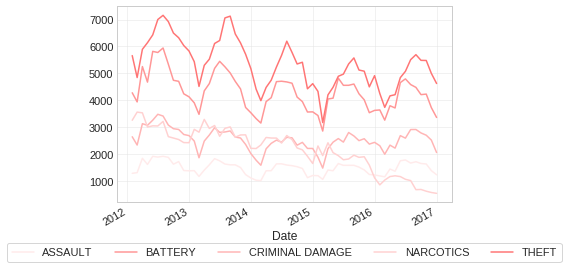

In [37]:
#Farben werden definiert
colors = ['#FFEBEB','#FF9797','#FFB5B5','#FFD1D1','#FF7575']

#Plot-Style
plt.style.use('seaborn-whitegrid')
DataAll.plot(kind ='line', color = colors)
plt.grid(color='#E5E5E5', linestyle='-', linewidth=0.5)

#legend = plt.legend(loc=1, frameon=True,  shadow=False)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.18),
          fancybox=True,frameon=True, shadow=False, ncol=5)
plt.show()

Deutlich zu sehen in dem obenstehenden Diagramm ist, dass die Anzahl der Verbrechen über die Jahre hinweg gesunken sind. Betrachtet man den Jahresverlauf von Diebstahl und Körperverletzung, ist festzustellen, dass sich diese sehr ähneln und es einen starken Anstieg von Verbrechen jeweils in den Sommer Monaten gibt. 
Dieses selbe saisonale Muster zeigt sich auch bei den Überfällen und Sachbeschädigung, jedoch nicht so stark.
Solch ein Muster ist bei Betäubungsmitteln zu erkennen, allerdings fällt hier ein starker Rückgang auf.

# 5. Ergebnisse kommunizieren
Ihr habt die Daten visualisiert und interpretiert. Nun diskutiert eure Ergebnisse und leitet deine Entscheidung her. Eventuell wollt ihr hier einen wichtigen Plot von 4. nochmal darstellen.

> Q1: Welche Verbrechen werden begangen?

> Q2: Wo werden die Verbrechen begangen?

> Q3: Wann werden die Verbrechen begangen?

> Q4: Wo sollen mehr Officers eingesetzt werden? 

> Q5: Wo sind mehr Kontrollen nötig? (ähnlich wie Q4?)

## 5.1 Ergebnisse diskutieren

Im Folgenden wollen wir insbesondere klären, wo die verfügbaren Officer eingesetzt werden sollten, um möglichst viele Straftaten zu vermeiden, und geringstes Personal dafür aufzuwenden. Zudem steht an erster Stelle die Unruhen bei den Bürgen zu verringern. 

###  Diskussion über mögliche Einsatzorte

**1. Interpretation der Karteergebnissen**

Betrachtet man die Karte von Chicago, kann festgehalten werden, dass vor allem mehr Polizeikräfte in der Community Area 32 in der North State Str benötigt werden, höchstwahrscheinlich, da im Zentrum von Chicago die meisten Straßengauner unterwegs sind. 
Außerdem sollten mehr Polizisten in der Community Area 66 in der South Cicero Avenue eingesetzt werden. Dies liegt eher abseits von der Innenstadt, in der Nähe der Gleise. Vermutlich könnten dies Hotspots von Clans, Banden oder ähnlichem sein. 
Ebenso zeigt sich, dass am O'Hare Flughafen (Community Area 76) vermehrt Verbrechen begangen werden.

**2. Interpretation der Arrest Statistik (Keine Festnahmen)**

 Betracht man die Arrest Statistik, welche uns die Rate der "Nicht-Festnahmen" gibt, kann auf Folgendes geschlossen werden. Die höchste Rate weist Community Area 7 auf, welche das Zentrum der Stadt darstellt. Hier kann auf eine hohe Kriminalität in den Straßen geschlossen werden.
Community Areas 12 & 9 weisen auch eine schlechte Rate auf. Aufgrund der Tatsache, dass diese die Grenzen von Chicago darstellen, kann schlussgefolgert werden, dass viele Straftaten unaufgedeckt bleiben.
Die Community Areas 41 & 72 liegen eher außerhalb. Hier sind, wie vermutet, eher die Clans und Banden unterwegs, welche erhöhten Drogenhandel aufweisen.

## 5.2 Entscheidung treffen

Wie man bereits sehen konnte, bilden Diebstähle, Körperverletzung und Sachbeschädigung den größten Teil (rund 55%) der Straftaten.
Hierbei finden die meisten Straftaten auf offener Straße, in Wohnungsgebieten und auf Bürgersteigen statt.
Man kann auch sehen, dass es in den frühen Morgenstunden zu den wenigsten Taten kommt (ca. 2 – 7 Uhr) und gegen Mittag (12 Uhr) sowie Abend (17 - 19 Uhr) die meisten Straftaten zu vermerken sind.
Betrachtet man diese drei Straftaten im Einzelnen, ist zu sehen, dass bei allen in den Sommermonaten die Anzahl der Verbrechen am höchsten ist.

### Unsere Empfehlung:

> Bei unserer Diskussion fällt auf, dass zum Einen gewisse Community Areas eine hohe Gesamtzahl an Straftaten aufweisen und zum Anderen Community Areas eher eine schlechte Verhaftungsrate aufzeigen.
> Versucht man beides zu beachten, so würden wir zuerst in der **Innenstadt (Community Areas 32 & 8 & 7)** mehr Officer einsetzen. Hier vor allem sollte man uniformierte Officer zwischen 12:00 - 20:00 Uhr einsetzen. Dadurch kann man auch einen höhere Polizeipräsenz sicherstellen und somit vermeintlich spürbare Ängste bei den Bürgern verringern.
> Zudem würden wir noch mehr Officer in den **ländlichen Regionen (Community Areas 2 & 41 & 72)** einsetzen, um dort die Diebstähle, den Schmuggel und Drogenhandeln bekämpfen zu können. Hierbei würden wir auf zivile Polizeikräfte setzen, um an die Hintermänner heranzukommen. 
> Schließlich könnte man noch weitere Officer **an den Grenzen (Community Areas 9 & 12)**, sowie am O'Hare **Flughafen (Community Area 76)** positionieren. Dort könnte man in erster Linie die Kontrollen verstärken, um mehr das Schmuggeln bekämpfen zu können.